In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas_profiling
import seaborn as sb

In [2]:
dir = "C:/Users/user/Documents/GitHub/II2202_Stacking-Regression-Comparative-Study/data"

In [16]:
stock = pd.read_csv(dir + "/Stock Portofolio.csv", header=0, encoding= 'unicode_escape')

In [17]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 Large B/P                                 63 non-null float64
 Large ROE                                 63 non-null float64
 Large S/P                                 63 non-null float64
 Large Return Rate in the last quarter     63 non-null float64
 Large Market Value                        63 non-null float64
 Small systematic Risk                     63 non-null float64
Annual Return                              63 non-null float64
dtypes: float64(7)
memory usage: 3.5 KB


In [18]:
stock.rename(columns=dict(zip(stock.columns, ['largeBP', 'largeROE', 'largeSP', 'largeReturn', 'largeValue', 'smallRisk', 'Return'])), inplace=True)

In [19]:
pandas_profiling.ProfileReport(stock)

Number of variables,7
Number of observations,63
Total Missing (%),0.0%
Total size in memory,3.5 KiB
Average record size in memory,57.3 B
Numeric,7
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [20]:
stock.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
largeBP,63.0,0.166619,0.199304,0.0,0.0,0.167,0.2915,1.0
largeROE,63.0,0.166619,0.199304,0.0,0.0,0.167,0.2915,1.0
largeSP,63.0,0.166619,0.199304,0.0,0.0,0.167,0.2915,1.0
largeReturn,63.0,0.166619,0.199304,0.0,0.0,0.167,0.2915,1.0
largeValue,63.0,0.166619,0.199304,0.0,0.0,0.167,0.2915,1.0
smallRisk,63.0,0.166619,0.199304,0.0,0.0,0.167,0.2915,1.0
Return,63.0,14.923810,2.787224,7.0,13.8,15.300,17.0000,19.5


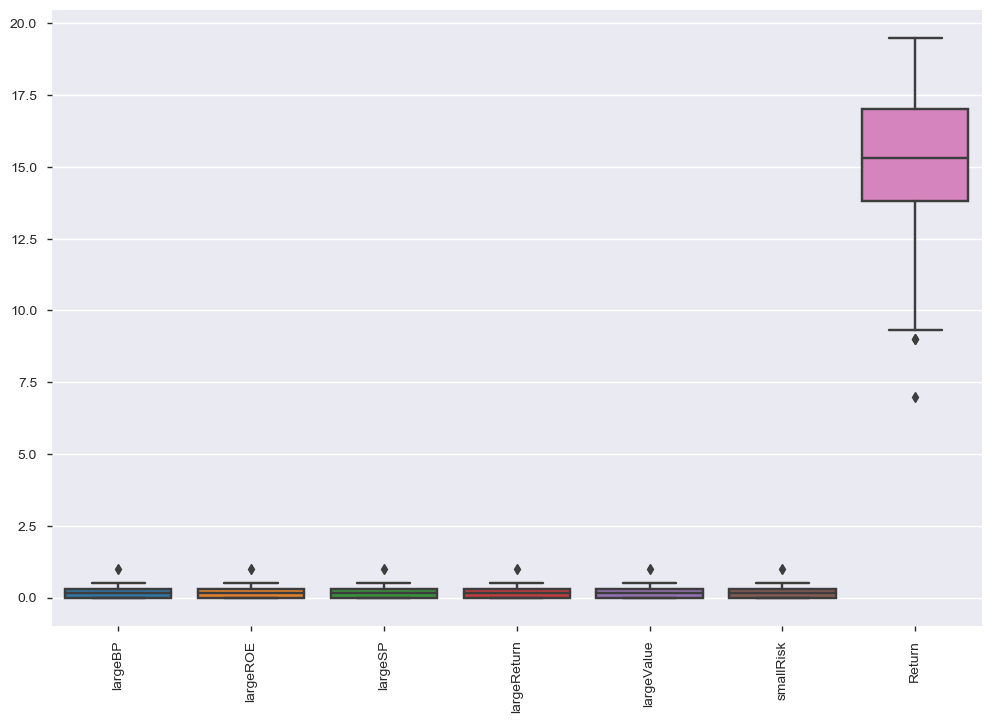

In [21]:
plt.subplots(figsize=(12, 8))
ax = sb.boxplot(data=stock)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

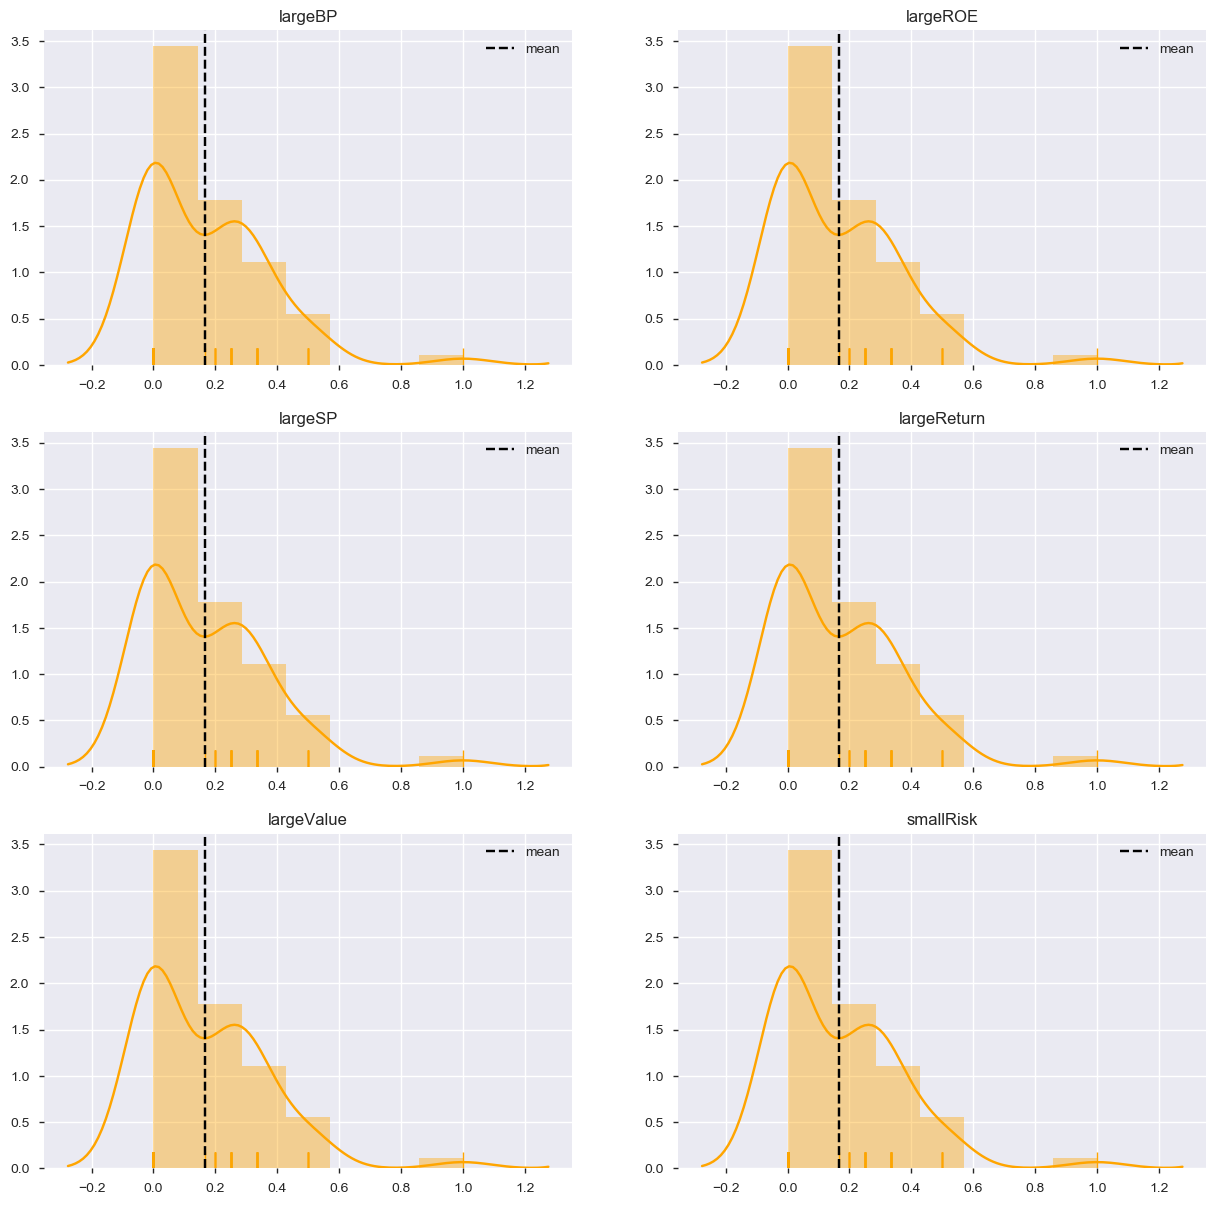

In [22]:
import itertools

cols = [i for i in stock.columns if i != 'Return']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sb.distplot(stock[i],color='orange',rug=True)
    plt.axvline(stock[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

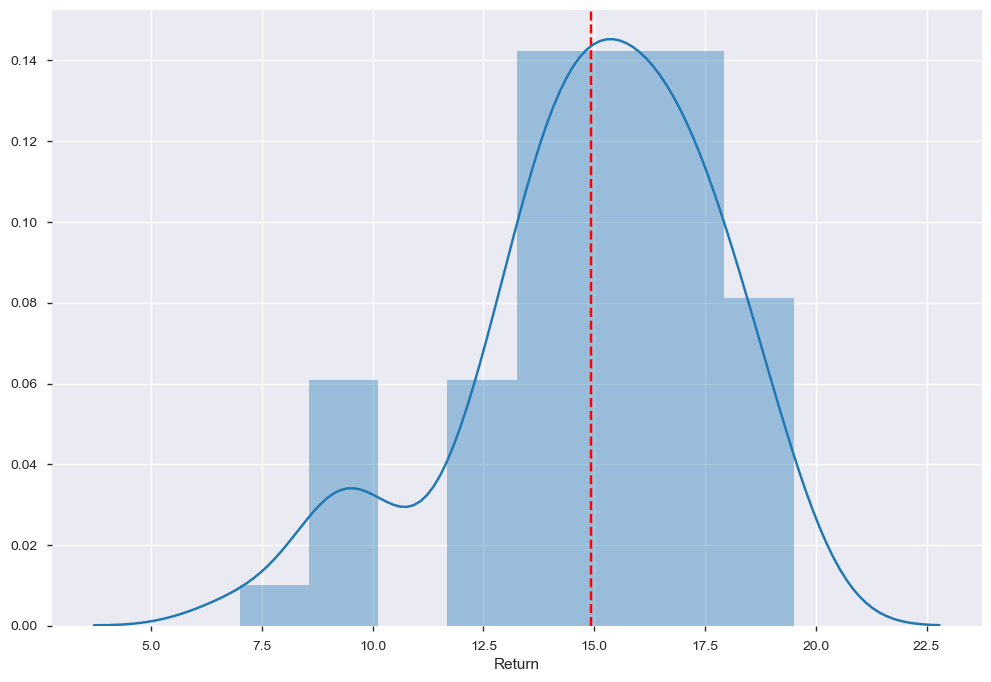

In [23]:
fig = plt.figure(figsize=(12, 8))
plt.axvline(stock.Return.mean(),linestyle="dashed",label="mean", color='red')
sb.distplot(stock.Return);

In [25]:
from scipy.stats import skew
numerical_features = stock.select_dtypes(include=[np.number]).columns
categorical_features = stock.select_dtypes(include=[np.object]).columns
skew_values = skew(stock[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
5,smallRisk,1.381536
2,largeSP,1.381536
4,largeValue,1.381536
1,largeROE,1.381536
3,largeReturn,1.381536
0,largeBP,1.381536
6,Return,-0.756402


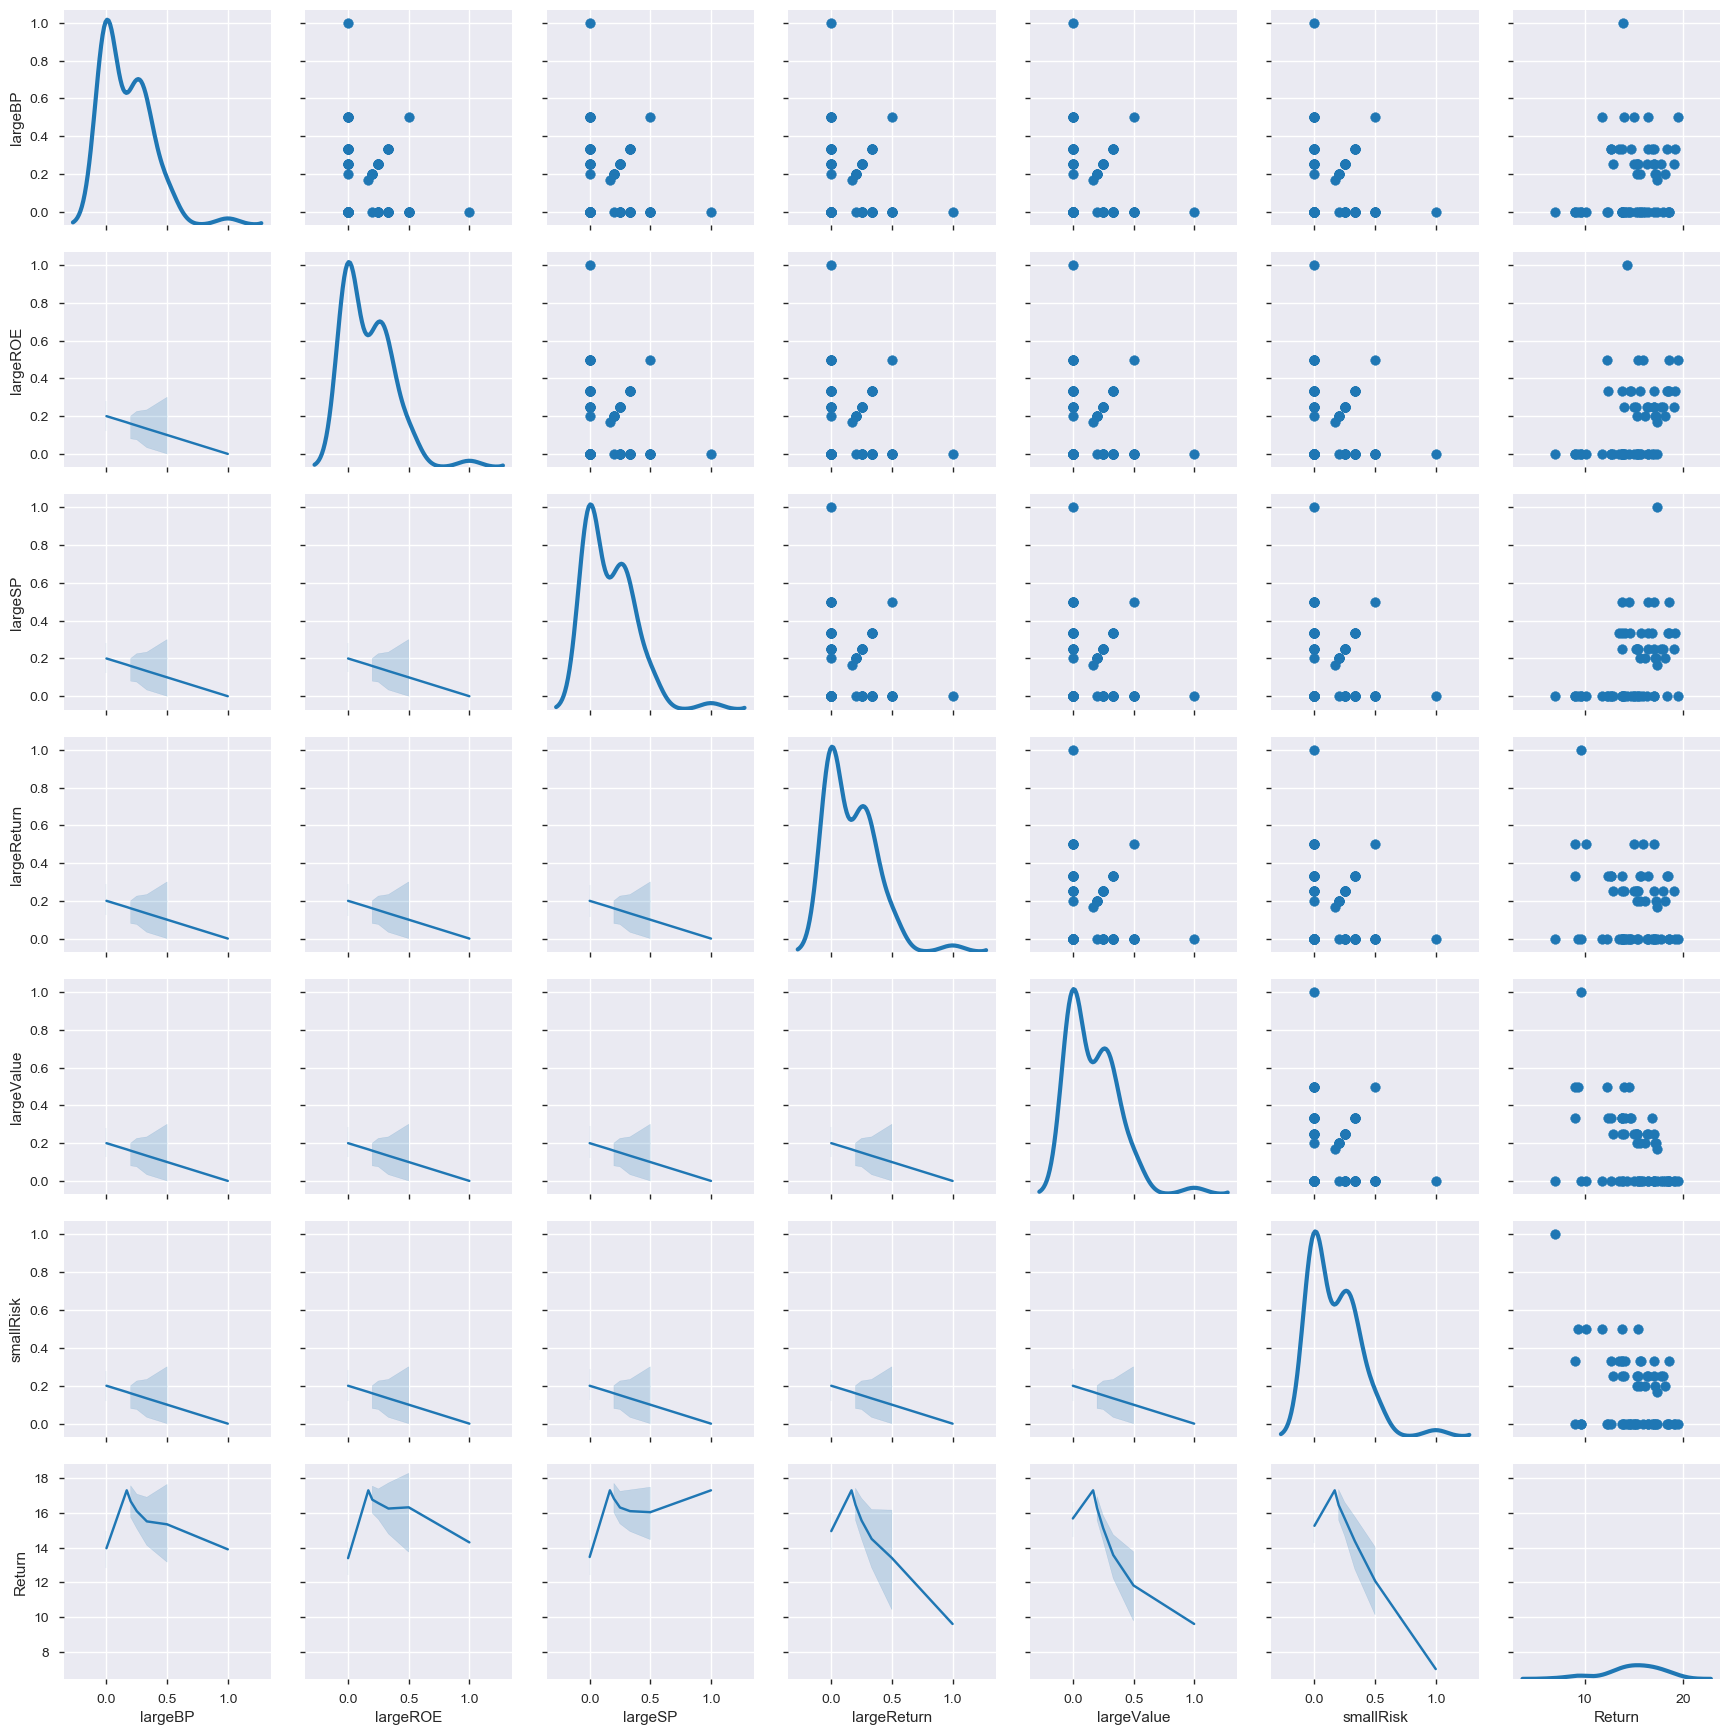

In [26]:
g = sb.PairGrid(stock)
g.map_upper(plt.scatter)
g.map_lower(sb.lineplot)
g.map_diag(sb.kdeplot, lw=3, legend=True);

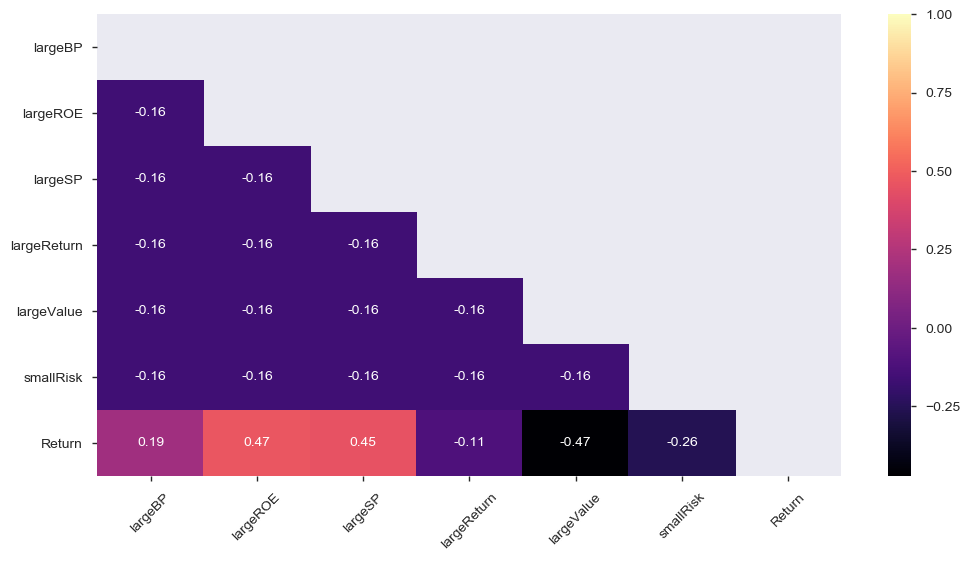

In [27]:
plt.subplots(figsize=(12, 6))
corr = stock.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sb.heatmap(data=corr, cmap='magma', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

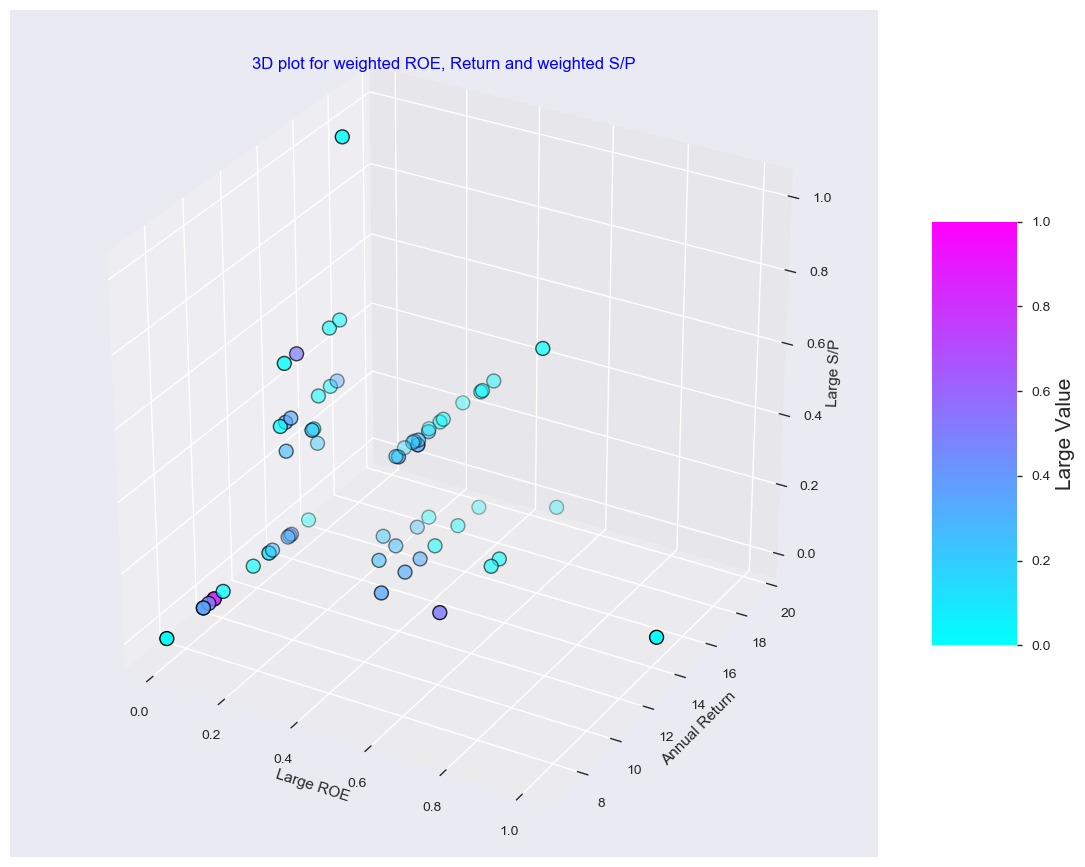

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")

plot =  ax.scatter(stock["largeROE"],
           stock["Return"],
           stock["largeSP"],
           linewidth=1,edgecolor ="k",
           c=stock["largeValue"],s=100,cmap="cool")

ax.set_xlabel("Large ROE")
ax.set_ylabel("Annual Return")
ax.set_zlabel("Large S/P")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Large Value",fontsize = 15)

plt.title("3D plot for weighted ROE, Return and weighted S/P",color="blue")
plt.show()